# Portafolios de Inversión
## Capital Asset Pricing Model - Python
José Armando Melchor Soto

---

#### Librerías 

In [47]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

#### Encontrar la valuación de TESLA

##### Tasa libre de Riesgo

In [10]:
# Tasa libre de Riesgo
rf = 0.0402 # Está anualizada al 4.02%

In [7]:
prices = yf.download(['TSLA', '^GSPC'], start = '2022-06-10', end = '2025-06-09')['Close']
prices.head()

[*********************100%***********************]  2 of 2 completed


Ticker,TSLA,^GSPC
Date,,
2022-06-10,232.229996,3900.860107
2022-06-13,215.736664,3749.629883
2022-06-14,220.889999,3735.479980
2022-06-15,233.000000,3789.989990
2022-06-16,213.100006,3666.770020


In [8]:
rets = prices.pct_change().dropna()
rets.head()

Ticker,TSLA,^GSPC
Date,,
2022-06-13,-0.071022,-0.038768
2022-06-14,0.023887,-0.003774
2022-06-15,0.054824,0.014593
2022-06-16,-0.085408,-0.032512
2022-06-17,0.017175,0.002201


#####  Rendimiento del mercado

In [17]:
r_market = rets[['^GSPC']].mean()*252 # Está anualizada 
r_market

Ticker
^GSPC    0.160535
dtype: float64

##### Rendimiento esperado CAM 

$$E[R] = r_f + \beta (r_m-r_f)$$

#### Beta

$$\beta = \frac{cov(activo,mercado)}{var (mercado)}$$

##### Covarianza 

In [22]:
cov_matriz = rets.cov()
beta = cov_matriz.iloc[0,1]/cov_matriz.iloc[1,1]
beta

2.067005795968691

##### Rendimiento Esperado CAPM

In [24]:
E_r_CAPM = rf + beta * (r_market - rf)
E_r_CAPM*100

Ticker
^GSPC    28.893384
dtype: float64

##### Rendimiento Real del activo 

In [25]:
real_ret = rets['TSLA'].mean() * 252
real_ret * 100

27.71546355626188

In [30]:
E_r_CAPM-real_ret

Ticker
^GSPC    0.011779
dtype: float64

In [59]:
x_temp = np.arange(0,2,0.1)
y_temp = np.arange(rf,0.4,0.02)

CAPM = rf+ x_temp * (y_temp - rf)
CAPM

ValueError: operands could not be broadcast together with shapes (20,) (18,) 

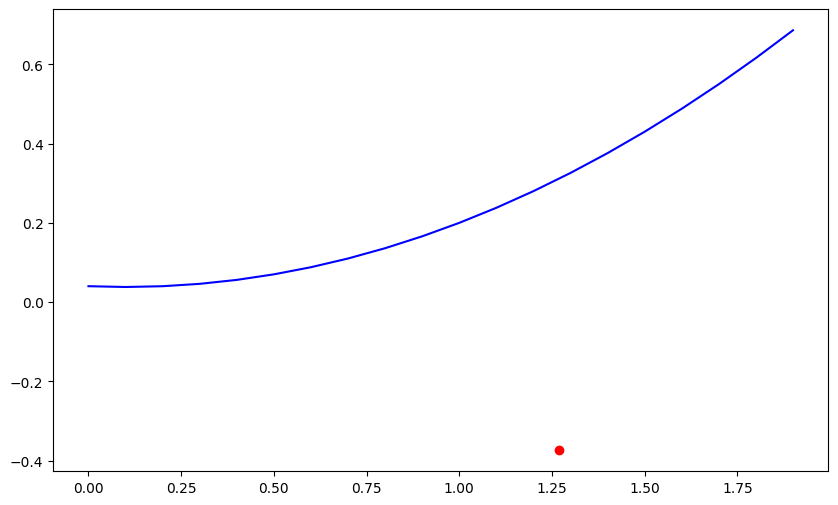

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(x_temp, CAPM, label='CAPM', color='blue')
plt.scatter(beta, real_ret, color='red', label='Retorno Real de TSLA')

El rendimiento esperado del CAPM está sobrevalorado , ya que el rendimiento esperado CAPM es mayor que el real del activo , ya que que está con un 1.17% más del activo real.

---

### Televisa 

In [32]:
prices = yf.download(['TLEVISACPO.MX', '^MXX'], start = '2022-06-10', end = '2025-06-09')['Close']
prices.head()

[*********************100%***********************]  2 of 2 completed


Ticker,TLEVISACPO.MX,^MXX
Date,,
2022-06-10,31.731487,48471.519531
2022-06-13,31.043444,48445.300781
2022-06-14,30.011379,48164.468750
2022-06-15,30.282974,48344.968750
2022-06-16,29.866531,47558.511719


##### Tasa libre de Riesgo

In [ ]:
# Tasa libre de Riesgo
rf = 0.0402 # Está anualizada al 4.02%

In [35]:
rets = prices.pct_change().dropna()
rets.head()

Ticker,TLEVISACPO.MX,^MXX
Date,,
2022-06-13,-0.021683,-0.000541
2022-06-14,-0.033246,-0.005797
2022-06-15,0.009050,0.003748
2022-06-16,-0.013752,-0.016268
2022-06-17,0.045771,0.009624


#### Rendimiento del Mercado 

In [38]:
r_market = rets[['^MXX']].mean()*252 # Está anualizada
r_market*100

Ticker
^MXX    7.281287
dtype: float64

#### Covarianza 

In [45]:
cov = rets.cov()
cov

Ticker,TLEVISACPO.MX,^MXX
Ticker,,
TLEVISACPO.MX,0.000805,0.000122
^MXX,0.000122,0.000096


#### beta

In [46]:
beta = cov.iloc[0,1]/cov.iloc[1,1]
beta

1.269368056655102

##### Rendimiento Esperado CAPM

In [41]:
E_CAPM = rf +beta * (r_market - rf)
E_CAPM*100

Ticker
^MXX    8.159774
dtype: float64

##### Rendimiento Real del activo 

In [42]:
real_ret = rets['TLEVISACPO.MX'].mean() * 252
real_ret * 100

-37.37302091298013

In [43]:
E_r_CAPM-real_ret

Ticker
^GSPC    0.662664
dtype: float64